# Мататематички методи за машинско учење 2023
## Домаћи задатак број 7

<div class="alert alert-block alert-danger">
<b>Име и презиме студента:</b> Никола Петровић

<b>Број индекса:</b> 1466
    
</div>    

<div class="alert alert-block alert-info">
<b>Упутство за израду и предају домаћег задатака: </b> 
    
    1. Пре почетка израде промените име датотеке у 07Domaci_Ime_Prezime. (убаците своје име и презиме) 
    2. Попуните ћелију испод наслова одговарајућим подацима. 
    1. Употреба ћирилице није обавезна за предају домаћег задатка.
    4. За решавање задатака, уколико је потребно, отворите испод текста задатка додатне ћелије за уписивање текстуалног одговора (Markdown) или програмског кода (Code).
    1. Сва израчунавања, уколико је потребно, вршити у Python-у.
    5. Након завршетка израде решења домаћег Notebook документ сачувати у pdf формату и проследити га наставнику. То можете да урадите или кроз Teams или на мејл адресу jovana.dzunic@elfak.ni.ac.rs

</div> 

In [7]:
import numpy as np
import numpy.random as rndm
import matplotlib as mplb
import matplotlib.pyplot as plt

**Задатак 1.** а) Израчунати DFT вектора генерисаних наредним кодом.


(5 поена)

In [8]:
u1 = np.ones(8)
u2 = np.array([1, -1j, 1j, -1])

# Izračunavanje DFT za vektore u1 i u2
dft_u1 = np.fft.fft(u1)
dft_u2 = np.fft.fft(u2)

print("DFT za vektor u1:\n", dft_u1)
print("DFT za vektor u2:\n", dft_u2)


DFT za vektor u1:
 [8.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
DFT za vektor u2:
 [0.+0.j 0.-2.j 2.+2.j 2.+0.j]


б) Ако је позната DFT вектора $v,$ $V=DFT(v),$ колико износи $DFT(3v)?$


(5 поена)

In [9]:
# Primer vektora v
v = np.array([1, 2, 3, 4, 5])

# Izračunavanje DFT za vektor v
V = np.fft.fft(v)

# Izračunavanje DFT za vektor 3v
dft_3v = np.fft.fft(3 * v)

# Provera jednakosti DFT(3v) i 3 * V
print("DFT(3v):\n", dft_3v)
print("3 * V:\n", 3 * V)


DFT(3v):
 [45.  +0.j         -7.5+10.3228644j  -7.5 +2.43689772j -7.5 -2.43689772j
 -7.5-10.3228644j ]
3 * V:
 [45.  +0.j         -7.5+10.3228644j  -7.5 +2.43689772j -7.5 -2.43689772j
 -7.5-10.3228644j ]


**Задатак 2.** Користећи брзу Фуријеову трансформацију написати код за брзо множење бројева у бројном систему основе $8.$

(10 поена)

In [10]:
n1, n2 = rndm.randint(333, 556, 2)
print(n1)
print(n2)
br1 = np.append(rndm.randint(1, 7, 1), rndm.randint(0, 7, n1 - 1))  # veći broj
br2 = np.append(rndm.randint(1, 7, 1), rndm.randint(0, 7, n2 - 1))  # manji broj

print(br1)
print(br2)

# Brza Furijeova transformacija (FFT) i konvolucija
n = n1 + n2 - 1
br1_fft = np.fft.fft(br1, n)
br2_fft = np.fft.fft(br2, n)
product_fft = br1_fft * br2_fft
product = np.fft.ifft(product_fft).real.round().astype(int)

# Korekcija rezultata
carry = np.zeros(product.shape, dtype=int)
for i in range(n - 1):
    carry[i + 1] = product[i] // 8
    product[i + 1] += carry[i + 1]
    product[i] %= 8

# Uklanjanje vodećih nula
product = np.trim_zeros(product, 'f')
print("Rezultat množenja (osnovica 8):", product)

516
547
[5 4 0 3 0 2 6 6 2 5 6 4 6 5 1 4 6 5 2 1 6 4 3 0 5 1 4 2 0 0 4 1 0 3 3 4 3
 5 2 5 4 5 2 4 5 1 5 3 5 2 1 5 5 0 4 4 5 1 2 2 5 5 3 0 6 2 0 3 2 3 6 6 3 5
 5 3 0 5 2 1 6 1 4 3 2 5 0 1 1 6 1 0 0 0 4 2 5 2 4 3 4 0 6 4 6 3 2 6 6 4 1
 3 2 2 1 5 2 0 4 4 1 5 6 3 0 4 0 3 4 0 1 6 0 3 4 4 4 1 0 5 2 2 5 5 5 2 4 6
 3 6 1 6 3 0 6 2 0 0 2 3 3 1 5 5 0 5 4 3 5 2 3 6 2 5 2 6 3 1 2 2 4 4 4 0 5
 2 2 0 3 1 5 1 5 2 6 1 1 6 1 2 4 5 6 4 4 2 5 3 5 3 4 4 4 4 1 4 6 2 1 4 1 6
 4 2 3 1 4 0 0 2 4 3 0 2 2 6 3 3 1 1 5 4 1 3 4 6 3 2 2 3 1 2 4 1 6 5 3 3 6
 4 6 6 0 4 0 0 6 6 4 4 0 4 0 1 5 0 3 2 4 2 2 6 1 1 1 6 2 6 5 1 2 3 0 3 0 2
 2 0 6 5 3 4 1 3 3 5 3 3 6 6 4 2 4 0 4 5 4 0 6 4 3 0 4 2 3 1 0 4 1 4 0 4 5
 0 3 6 6 3 1 6 2 3 2 4 0 4 6 4 0 4 3 4 2 2 4 4 3 4 6 6 2 3 0 6 1 1 2 3 4 2
 5 5 2 3 1 5 6 0 3 1 1 5 0 2 1 0 2 5 2 0 6 2 5 4 4 6 0 5 1 6 3 2 6 0 1 6 4
 0 4 2 2 0 1 1 2 4 5 2 5 3 2 4 3 1 1 5 4 1 2 4 1 5 5 0 1 3 6 1 3 5 6 4 3 6
 3 2 5 6 4 5 0 5 4 6 1 0 6 6 2 0 6 1 6 1 6 3 3 1 5 6 1 2 3 6 0 4 1 6 4 3 5
 1 4 6 3 2 2 2 3 

**Задатак 3.** Функција $f$ је узоркована у еквидистантним тачкама на интервалу $[-\pi,\pi).$ Вектор $y$ садржи резултате овог узорковања. Након примене функције `fft` на вектор $y$ добијен је вектор $c=\begin{bmatrix}0 & -5i & 1-3i & 4 & 0 & 4 & 1+3i & 5i\end{bmatrix}.$ Наћи вектор $y$ и тригонометријски полином који интерполира функцију $f$ на узоркованим подацима. Дати графички приказ података и добијеног тригонометријског полинома.


(10 поена)

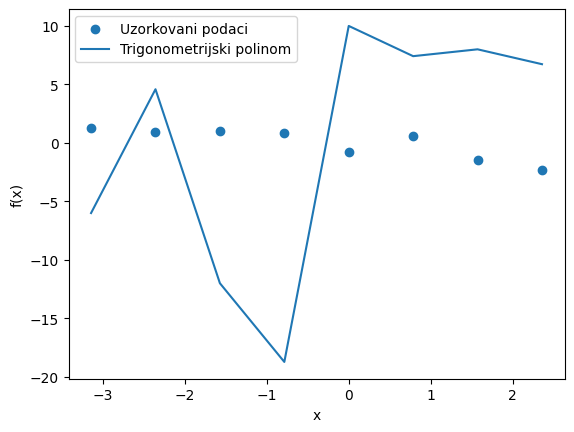

In [11]:
# DFT koeficijenti
c = np.array([0, -5j, 1 - 3j, 4, 0, 4, 1 + 3j, 5j])

# Inverzna brza Furijeova transformacija (IFFT)
y = np.fft.ifft(c)

# Trigonometrijski polinom
def trigonometric_poly(x, coeffs):
    n = len(coeffs)
    result = coeffs[0] / 2
    for k in range(1, n // 2):
        result += coeffs[k] * np.exp(1j * k * x) + coeffs[-k] * np.exp(-1j * k * x)
    if n % 2 == 0:
        result += coeffs[n // 2] * np.cos(n // 2 * x)
    return result.real

# Vrednosti x
x_values = np.linspace(-np.pi, np.pi, len(c), endpoint=False)

# Izračunavanje vrednosti polinoma
poly_values = trigonometric_poly(x_values, c)

# Grafički prikaz podataka i dobijenog trigonometrijskog polinoma
plt.scatter(x_values, y.real, marker='o', label='Uzorkovani podaci')
plt.plot(x_values, poly_values, label='Trigonometrijski polinom')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()